In [1]:
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

from matplotlib import pylab as plt
import numpy as np
from glob import glob
from util import *
from model import *
from tqdm import tqdm_notebook
from prefetch_generator import BackgroundGenerator

/Users/nakamuraamane/.virtualenvs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/nakamuraamane/.virtualenvs/tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


image_dim_ordering:tf


In [5]:
#load images
serv = ".."
pathimg = serv+"/data/image/"
pathans = serv+"/data/image red/"
size = 40
resize = 30

img = [cv2.imread(name)[:, :,::-1] for name in sorted(glob(pathimg + "*"))]
ans = [cv2.imread(name)[:, :,::-1] for name in sorted(glob(pathans + "*"))]

In [6]:
# ready for training/visualization
import tensorflow as tf
# config = tf.ConfigProto(#device_count={'GPU': 0},
#             gpu_options=tf.GPUOptions(allow_growth=True, visible_device_list="0"))
# session = tf.Session(config=config)
session = tf.Session()
model_size = resize
classes = 1
mod = get_net(model_size, classes, session=session)
mod.load_weights(serv + "/model/model-9.h5")

HBox(children=(IntProgress(value=0, max=26), HTML(value='')))

3114


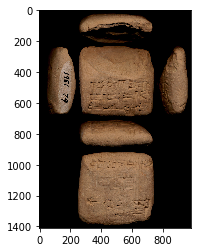

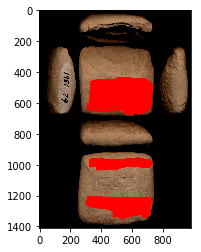

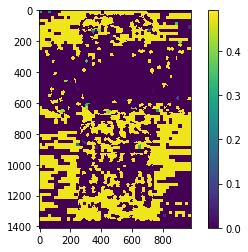

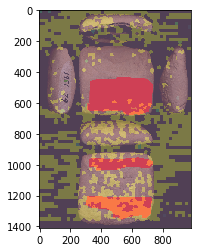

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

HBox(children=(IntProgress(value=0, max=3186), HTML(value='')))

3083



Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/nakamuraamane/.virtualenvs/tf/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/nakamuraamane/.virtualenvs/tf/bin/../lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



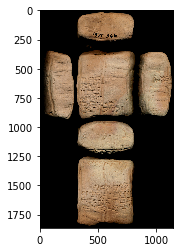

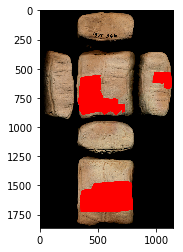

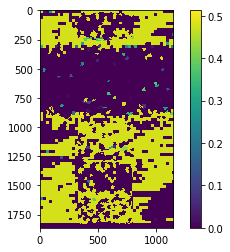

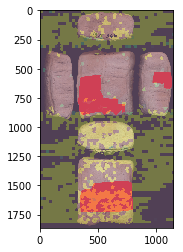

HBox(children=(IntProgress(value=0, max=24), HTML(value='')))

2826


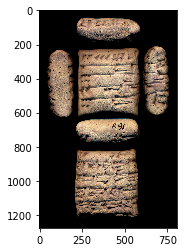

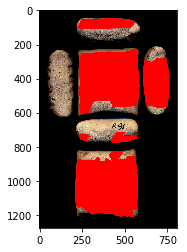

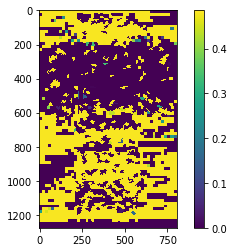

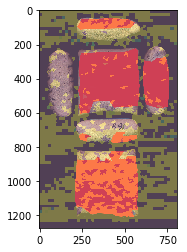

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))

HBox(children=(IntProgress(value=0, max=3172), HTML(value='')))

3049



Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/nakamuraamane/.virtualenvs/tf/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/nakamuraamane/.virtualenvs/tf/bin/../lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



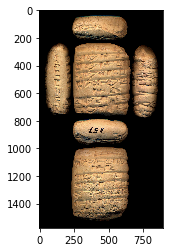

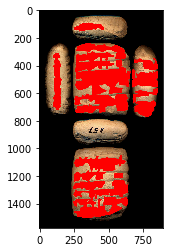

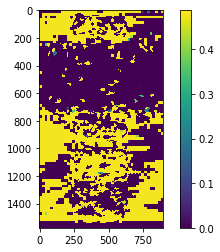

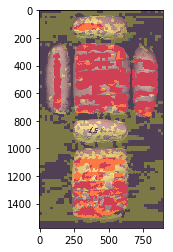

In [4]:
#visualization of image
res = []
for i in range(4):
    test = img[i]
    testans = ans[i]
    res.append(visualize(mod, test, size=28, resize=model_size, division=3500, batch_size=128))
    plt.imshow(test)
    plt.show()
    plt.imshow(testans)
    plt.show()
    plt.imshow(res[i])
    plt.colorbar()
    plt.show()
    plt.imshow(res[i],alpha=0.5)
    plt.imshow(testans,alpha=0.5)
    plt.show()